0.导入依赖

In [1]:
import matplotlib.pyplot  as plt
import cv2
import numpy as np

0.导入图像

In [2]:
img = cv2.imread('puff.png')
img = np.flip(img,2)
hist = cv2.calcHist([img],[0],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]

0.图像显示函数

In [3]:
def cv_show(name,img):
    img = np.flip(img,2)
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def cv_show_gray(name,img):
    cv2.imshow(name,img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
#展示累计直方图函数
def showSumHist(img):
    print('The cumHist plot is:')
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]
    plt.plot(cum_hist)
    plt.show()

#### 1.显示灰度图

In [6]:
histSize = 256
histRange = (0,256)

I_BAR = cv2.split(img)

In [7]:
rHist = cv2.calcHist(I_BAR,[0],None,[histSize],histRange)
gHist = cv2.calcHist(I_BAR,[1],None,[histSize],histRange)
bHist = cv2.calcHist(I_BAR,[2],None,[histSize],histRange)

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x2cfeb8aba48>])

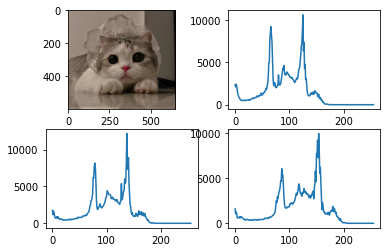

In [8]:
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.plot(bHist)
plt.subplot(223),plt.plot(gHist)
plt.subplot(224),plt.plot(rHist)

In [9]:
#封装为函数 我们以后将图片直接read为灰度图片
def showHist(img):
    histSize = 256
    histRange = (0,256)
    I_BAR = cv2.split(img)
    bHist = cv2.calcHist(I_BAR,[2],None,[histSize],histRange)
    gHist = cv2.calcHist(I_BAR,[1],None,[histSize],histRange)
    rHist = cv2.calcHist(I_BAR,[0],None,[histSize],histRange)
    plt.subplot(221),plt.imshow(img,'gray')
    plt.subplot(222),plt.plot(bHist)
    plt.subplot(223),plt.plot(gHist)
    plt.subplot(224),plt.plot(rHist)
    plt.show()

#### 2.直方图均衡化
##### 1.内置函数

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x2cfeba82708>])

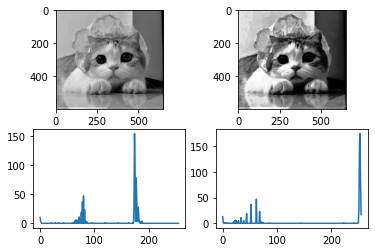

In [10]:
img1 = cv2.imread('puff.png',0)
res = cv2.equalizeHist(img1)

Hist1 = cv2.calcHist(img1,[0],None,[histSize],histRange)
Hist2 = cv2.calcHist(res,[0],None,[histSize],histRange)

plt.subplot(221),plt.imshow(img1,'gray')
plt.subplot(222),plt.imshow(res,'gray')
plt.subplot(223),plt.plot(Hist1)
plt.subplot(224),plt.plot(Hist2)

改变RGB的颜色

(<AxesSubplot:>, [<matplotlib.lines.Line2D at 0x2cfebc59d48>])

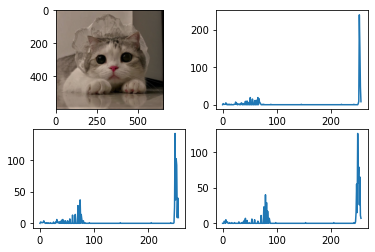

In [11]:
img1 = cv2.imread('puff.png')
I_BAR = cv2.split(img)
I_BAR_B = cv2.equalizeHist(I_BAR[0])
I_BAR_G = cv2.equalizeHist(I_BAR[1])
I_BAR_R = cv2.equalizeHist(I_BAR[2])

bHist = cv2.calcHist(I_BAR_B,[0],None,[histSize],histRange)
gHist = cv2.calcHist(I_BAR_G,[1],None,[histSize],histRange)
rHist = cv2.calcHist(I_BAR_R,[2],None,[histSize],histRange)

plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.plot(bHist)
plt.subplot(223),plt.plot(gHist)
plt.subplot(224),plt.plot(rHist)

##### 2.算数运算

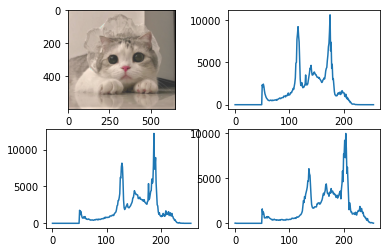

NameError: name 'img3' is not defined

In [12]:
img2 = img + 50
showHist(img2)
cv_show('算术运算',img2)
cv_show('puff',img2)
showSumHist(img3)

搞不懂了 这里老师又用了灰度图片 那我也重新写一下好了

In [ ]:
img = cv2.imread('puff.png',cv2.IMREAD_GRAYSCALE)

In [ ]:
# Draw a plot in a given image drawing context
# @param[in, out] image image drawing context
# @param[in] data_array data to draw
# @param[in] color color to use when drawing
# @param[in] max_val scale factor for the histogram values (default is 1)
def DrawGraph(image, data_array, color, max_val = 1.0):
  image_w = image.shape[1];
  image_h = image.shape[0];
  data_size = data_array.shape[0];

  step = image_w / data_size;
    
  for i in range(1, data_size):
    cv2.line(image, 
            (round(step * (i - 1)), image_h - int(image_h * data_array[i - 1] / max_val)),
            (round(step * i),       image_h - int(image_h * data_array[i] / max_val)),
            color, thickness = 1)

# Draw a histogram in a given image drawing context
# @param[in, out] image image drawing context
# @param[in] data_array data to draw
# @param[in] color color to use when drawing
# @param[in] max_val scale factor for the histogram values (default is 1)
def DrawHist(image, data_array, color, max_val = 1.0):
  image_w = image.shape[1];
  image_h = image.shape[0];
  data_size = data_array.shape[0];

  step = image_w / data_size;

  for i in range(1, data_size):
    cv2.rectangle(image, 
                 (round(step * (i - 1)), image_h - int(image_h * data_array[i - 1] / max_val)),
                 (round(step * i),       image_h),
                 color, thickness = -1)


In [ ]:
#展示图片函数
def show_lut(name,lut,img):
    img_lut = cv2.LUT(img,lut)
    cv_show('Image after the LUT',img_lut)
    hist = cv2.calcHist([img_lut],[0],None,[256],[0,256])
    cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]
    hist_img = np.full((256,512,3),255,dtype = np.int8)
    DrawHist(hist_img,hist,(127,127,127),hist.max())
    DrawGraph(hist_img,cum_hist,(0,0,0),1)
    cv_show(name,hist_img)

##### 3.动态范围扩展
Dynamic Range Stretching
$$
I_{new} = (\frac{I-I_{min}}{I_{max}-I_{min}})^\alpha
$$

In [ ]:
alpha = 0.5
#这里需要将原来图片数据类型int8变换为float
#因为这里的计算会用到浮点数
img3 = np.zeros(img.shape,dtype = np.float32)

for k in range(img.shape[2]):
    Imin = img[:,:,k].min()
    Imax = img[:,:,k].max()
    img3[:,:,k] = np.clip((((img[:,:,k] - Imin)/(Imax - Imin))**alpha),0,1)

img3 = (255 * img3).clip(0, 255).astype(np.uint8)
showHist(img3)
showSumHist(img3)

用老师的代码重写一遍

##### 4.统一转换
Uniform Transformation
$$I_{new}=I_{min}-\frac{1}{\alpha}*ln(1-P(I))$$

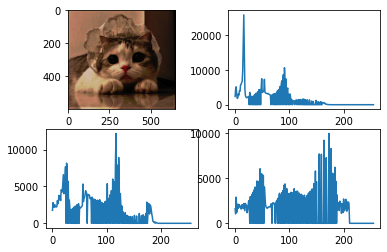

The cumHist plot is:


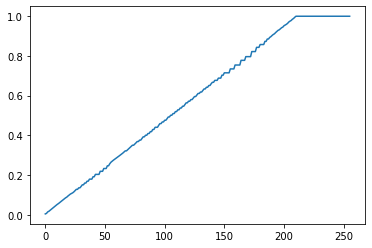

In [13]:
#R通道
hist = cv2.calcHist([img],[0],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]

img4 = np.zeros(img.shape,dtype = np.uint8)

for k in range(img.shape[2]):
    Imin = img[:,:,k].min()
    Imax = img[:,:,k].max()
    img4[:,:,k] = np.clip( (Imax-Imin)*cum_hist[img[:,:,k]] + Imin  ,0,255)
showHist(img4)
showSumHist(img4)

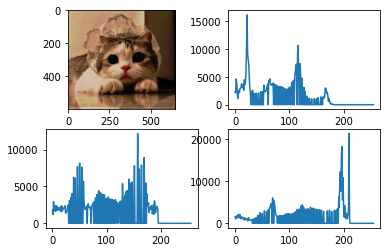

The cumHist plot is:


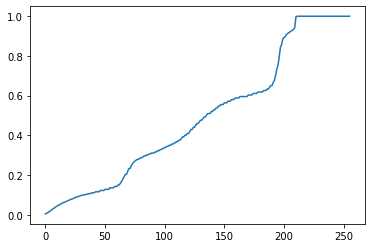

In [436]:
#B通道
hist = cv2.calcHist([img],[1],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]

img4 = np.zeros(img.shape,dtype = np.uint8)

for k in range(img.shape[2]):
    Imin = img[:,:,k].min()
    Imax = img[:,:,k].max()
    img4[:,:,k] = np.clip( (Imax-Imin)*cum_hist[img[:,:,k]] + Imin  ,0,255)
showHist(img4)
showSumHist(img4)

##### 指数转换
Exponential Transformation
$$I_{new}=I_{min}-\frac{1}{\alpha}*ln(1-P(I))$$

In [395]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]
alfa = 0.1
img5 = np.zeros(img.shape,dtype = np.uint8)

for k in range(img.shape[2]):
    Imin = img[:,:,k].min()
    Imax = img[:,:,k].max()
    img5[:,:,k] =  Imin - 1 / alfa * np.log(1 + 1e-3 - cum_hist[img[:,:,k]])

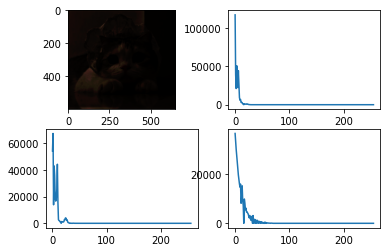

The cumHist plot is:


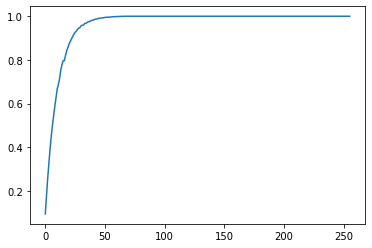

In [435]:
#img5 = (255 * img5).clip(0, 255).astype(np.uint8)
showHist(img5)
showSumHist(img5)

##### Rayleigh Transformation
$$I_{new} = I_{min} + (2\alpha ^2ln(\frac{1}{1-P(I)}))^\frac{1}{2}$$

In [644]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]
alfa = 0.3
img6 = np.zeros(img.shape,dtype = np.float32)

for k in range(img.shape[2]):
    Imin = img[:,:,k].min()
    img6[:,:,k] = Imin + (2 * alfa ** 2 *np.log(1 / (1 - cum_hist[img[:,:,k]])))**0.5

D:\Anaconda\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


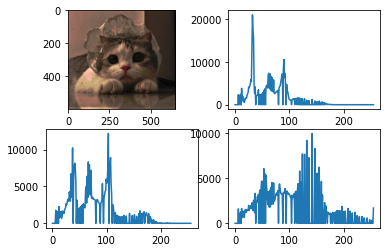

The cumHist plot is:


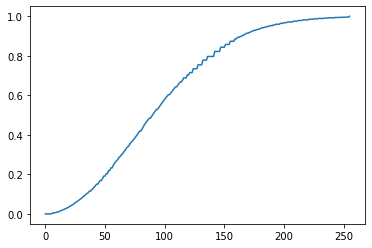

In [645]:
img6 = (255 * img6).clip(0, 255).astype(np.uint8)
showHist(img6)
showSumHist(img6)

##### Transformation of 2/3-degree
$$I_{new} = P(I)^\frac{2}{3}$$

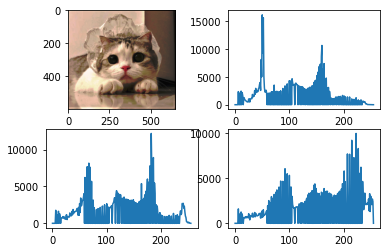

The cumHist plot is:


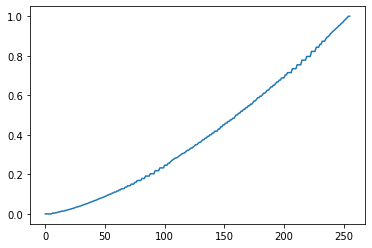

In [463]:
img7 = np.zeros(img.shape,dtype = np.float32)

for k in range(img.shape[2]):
    img7[:,:,k] = cum_hist[img[:,:,k]] ** (2/3)

img7 = (255 * img7).clip(0, 255).astype(np.uint8)
showHist(img7)
showSumHist(img7)

##### Hyperbolic Transformation
$$I_{new}=\alpha^P(I)$$

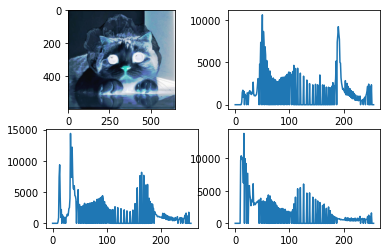

The cumHist plot is:


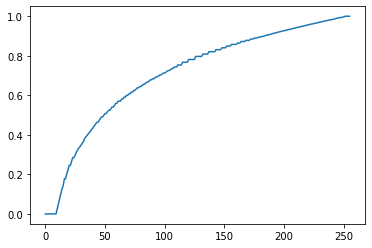

In [466]:
alfa = 0.04
img8 = np.zeros(img.shape,dtype = np.float32)

for k in range(img.shape[2]):
    img8[:,:,k] = alfa ** cum_hist[img[:,:,k]]

img8 = (255 * img8).clip(0, 255).astype(np.uint8)
showHist(img8)
showSumHist(img8)

##### 使用内置函数

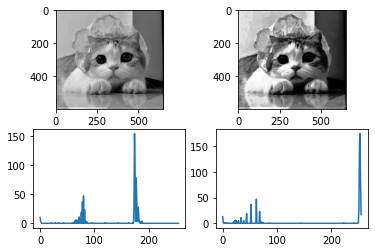

The cumHist plot is:


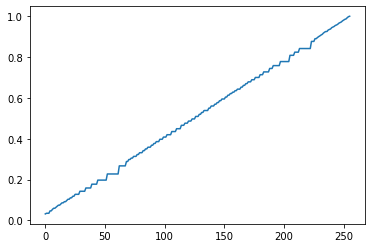

The cumHist plot is:


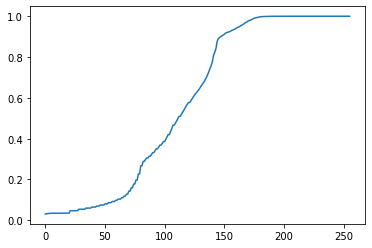

In [488]:
img1 = cv2.imread('puff.png',0)
res = cv2.equalizeHist(img1)

histSize1 = 256
histRange1 = (0,256)

Hist1 = cv2.calcHist(img1,[0],None,[histSize1],histRange1)
Hist2 = cv2.calcHist(res,[0],None,[histSize1],histRange1)

plt.subplot(221),plt.imshow(img1,'gray')
plt.subplot(222),plt.imshow(res,'gray')
plt.subplot(223),plt.plot(Hist1)
plt.subplot(224),plt.plot(Hist2)
plt.show()

showSumHist(res)
showSumHist(img1)

##### createCLAHE


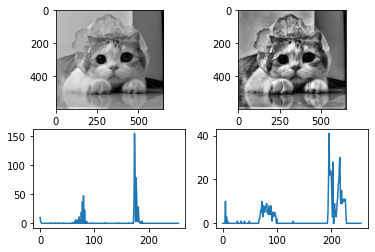

The cumHist plot is:


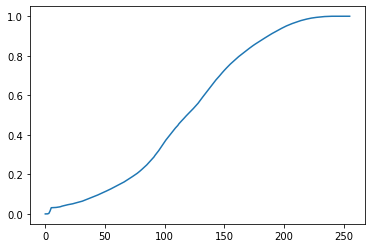

The cumHist plot is:


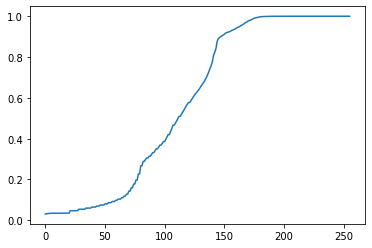

In [675]:
clahe = cv2.createCLAHE()
clahe.setClipLimit(4)
res = clahe.apply(img1)

histSize1 = 256
histRange1 = (0,256)

Hist1 = cv2.calcHist(img1,[0],None,[histSize1],histRange1)
Hist2 = cv2.calcHist(res,[0],None,[histSize1],histRange1)

plt.subplot(221),plt.imshow(img1,'gray')
plt.subplot(222),plt.imshow(res,'gray')
plt.subplot(223),plt.plot(Hist1)
plt.subplot(224),plt.plot(Hist2)
plt.show()

showSumHist(res)
showSumHist(img1)

In [ ]:
#展示图片函数
def show_lut(name,lut,img):
    img_lut = cv2.LUT(img,lut)
    cv_show('Image after the LUT',img_lut)
    hist = cv2.calcHist([img_lut],[0],None,[256],[0,256])
    cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]
    hist_img = np.full((256,512,3),255,dtype = np.int8)
    DrawHist(hist_img,hist,(127,127,127),hist.max())
    DrawGraph(hist_img,cum_hist,(0,0,0),1)
    cv_show(name,hist_img)

##### Lookup table

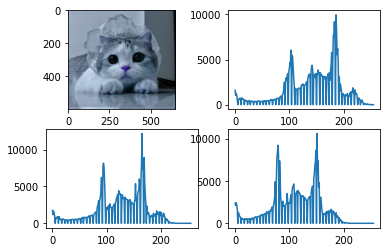

The cumHist plot is:


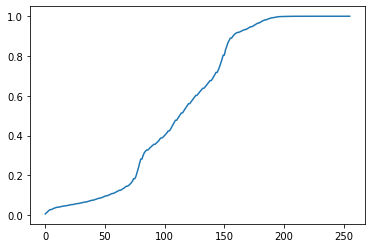

In [696]:
img = cv2.imread ( 'puff.png'  )
alfa = 0.5
lut = np.arange(256, dtype = np.uint8)
lut = (lut - img.min()) / (img.max() - img.min())
Inew = cv2.LUT(img, lut)
Inew = (255 * Inew).clip(0, 255).astype(np.uint8)

showHist(Inew)
showSumHist(Inew)

### 图像轮廓检测

In [517]:
I = cv2.imread ( 'BarCode.png' , cv2.IMREAD_GRAYSCALE )
profile = I[ round ( I . shape [0] / 2) ,:]

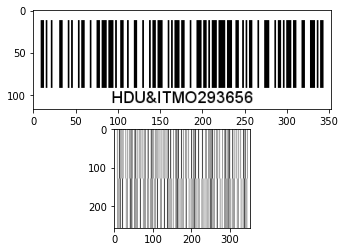

In [539]:
#获得一个大小合适的纯白色图像
profile_img = np.full((256,I.shape[1],3),255,dtype = np.uint8)   
DrawGraph(profile_img,profile,(0,0,0),profile.max())

plt.subplot(211),plt.imshow(I,'gray')
plt.subplot(212),plt.imshow(profile_img,'gray')
plt.show()

将图片显示封装为函数 能够同时显示灰度图片与RGB图片

In [553]:
def showProfile(img):
    if(img.ndim == 2):
        #灰度图像只有两个维度
        profile = img[ round ( img.shape[0] / 2) ,:]
    else:
        profile = img[ round ( img.shape[0] / 2) ,:,:]
    
    #创建一个纯白色图像
    profile_img = np.full((256,I.shape[1],3),255,dtype = np.uint8)
    
    if img.ndim == 2:
        DrawGraph(profile_img,profile,(0,0,0),profile.max())
    else:
        DrawGraph(profile_img,profile[:,0],(255,0,0),profile.max())
        DrawGraph(profile_img,profile[:,1],(0,255,0),profile.max())
        DrawGraph(profile_img,profile[:,1],(0,0,255),profile.max())
    plt.subplot(121),plt.imshow(img,'gray')
    plt.subplot(122),plt.imshow(profile_img,'gray')
    plt.show()

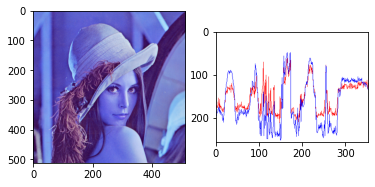

In [555]:
I1 = cv2.imread('test2.png')
showProfile(I1)

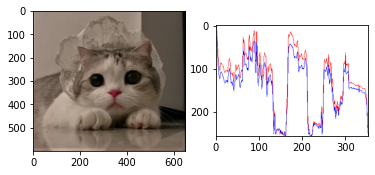

In [557]:
showProfile(img)

### 图像的投影

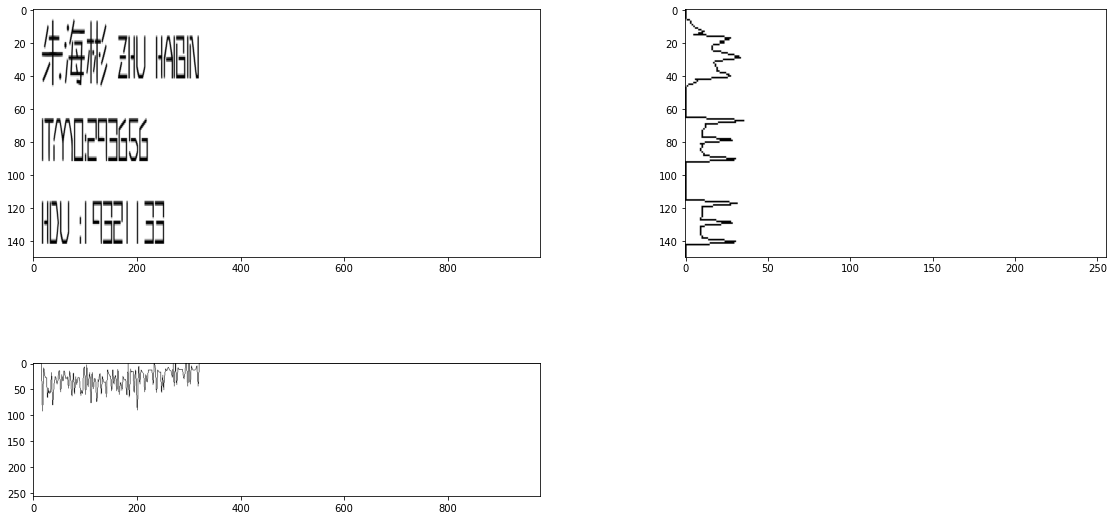

In [595]:
img2 = cv2.imread('name.png',cv2.IMREAD_COLOR)

if img2.ndim == 2:
    Proj_x = np.sum(img2,1) / 255
    Proj_y = np.sum(img2,1) / 255
else:
    proj_x = np.sum(img2,(0,2)) / 255 / img.shape[2]
    proj_y = np.sum(img2,(1,2)) / 255 / img.shape[2]

proj_x_img = np.full((256,img2.shape[1],3),255,dtype = np.uint8)
proj_y_img = np.full((256,img2.shape[0],3),255,dtype = np.uint8)

DrawGraph(proj_x_img,proj_x,(0,0,0),proj_x.max())
DrawGraph(proj_y_img,proj_y,(0,0,0),proj_y.max())

#翻转y轴投影的坐标轴 并且
proj_y_img = cv2.transpose(proj_y_img)
#这个是用来镜像翻转的 但是我好像用不到
#proj_y_img = cv2.flip(proj_y_img,1)

plt.figure(figsize=(20,10)) 
plt.subplot(221),plt.imshow(img2,'gray',aspect='auto')
plt.subplot(222),plt.imshow(proj_y_img,'gray')
plt.subplot(223),plt.imshow(proj_x_img,'gray')
plt.show()

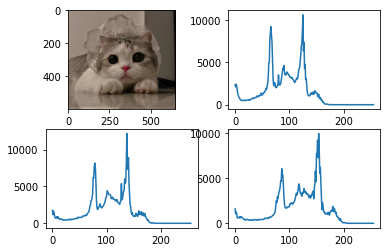

The cumHist plot is:


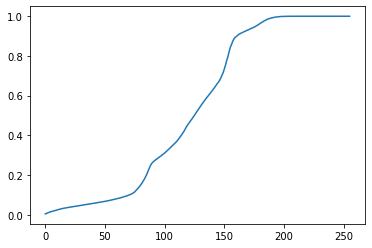

In [598]:
showHist(img)
showSumHist(img)

In [49]:
image = cv2.imread('puff.png',0)
cv_show_gray('puff',image)

In [29]:
image

array([[188, 188, 188, ...,   1,   1,   1],
       [188, 188, 188, ...,   1,   1,   0],
       [188, 188, 186, ...,   2,   2,   2],
       ...,
       [117, 120, 123, ...,  72,  66,  61],
       [115, 118, 120, ...,  72,  64,  59],
       [112, 114, 118, ...,  70,  64,  59]], dtype=uint8)

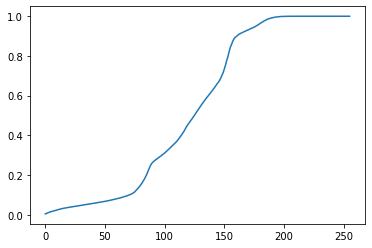

In [48]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]

plt.plot(cum_hist)

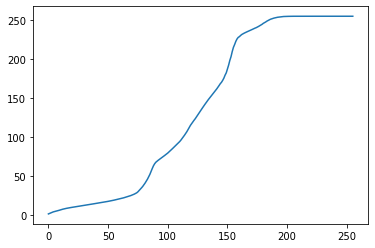

In [62]:
lut = 255 * cum_hist

plt.plot(lut)

# Use the Lookup table

In [45]:
I = cv2.imread('puff.png',0)
hist = cv2.calcHist([I],[0],None,[256],[0,256])
cum_hist = np.cumsum(hist) / img.shape[0] / img.shape[1]
Imax = I.max()
Imin = I.min()

The cumHist plot is:


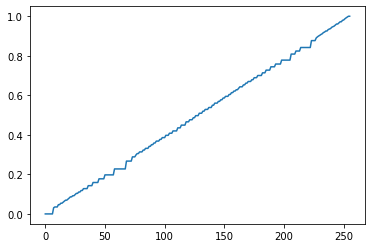

In [43]:
# lut = np.arange(256,dtype = np.uint8)
# alfa = 0.5
# lut = ((I - I.min())/(I.max()-I.min())) ** alfa

lut = (255*cum_hist).clip(0,255).astype(np.uint8)
Inew = cv2.LUT(I,lut)
cv_show_gray('LUT0',Inew)
showSumHist(Inew)

The cumHist plot is:


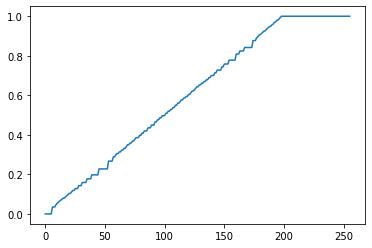

In [52]:
lut = (Imax-Imin)*cum_hist + Imin
Inew = cv2.LUT(I,lut).clip(0,256).astype(np.uint8)
cv_show_gray('LUT2',Inew)
showSumHist(Inew)

The cumHist plot is:


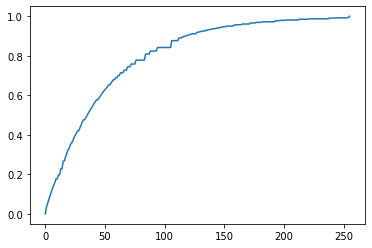

In [94]:
alfa = 5
lut = Imin/255 - 1.0/alfa*np.log(1.0000001-cum_hist)
lut = (255*lut).clip(0,255).astype(np.uint8)

Inew = cv2.LUT(I,lut)

cv_show_gray('LUT3',Inew)
showSumHist(Inew)

The cumHist plot is:


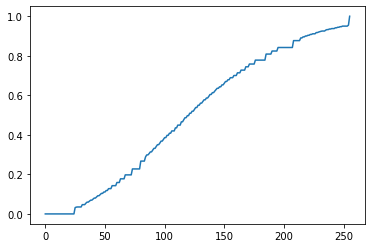

In [100]:
alfa = 0.4
lut = Imin + (2*alfa*alfa*np.log(1/(1.00001-cum_hist)))**0.5
lut = (255*lut).clip(0,255).astype(np.uint8)

Inew = cv2.LUT(I,lut)
cv_show_gray('LUT4',Inew)
showSumHist(Inew)

The cumHist plot is:


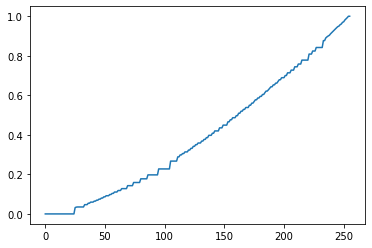

In [103]:
lut = cum_hist**(2/3)
lut = (255*lut).clip(0,255).astype(np.uint8)

Inew = cv2.LUT(I,lut)
cv_show_gray('LUT5',Inew)
showSumHist(Inew)

The cumHist plot is:


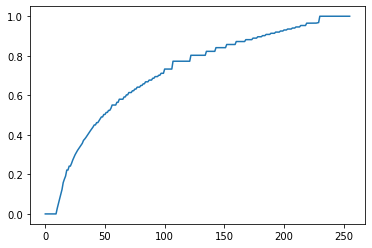

In [105]:
alfa = 0.04
lut = alfa ** cum_hist
lut = (255*lut).clip(0,255).astype(np.uint8)

Inew = cv2.LUT(I,lut)
cv_show_gray('LUT5',Inew)
showSumHist(Inew)